In [1]:
import builder as builder
import geopandas as gpd
import pandas as pd

# Demostration of the thesis code

### Loading the data files

In [2]:
klein_raw = pd.read_csv('data/klein/results.csv')
klein_agg = gpd.read_file('data/klein/agg_results.geojson')

gross_raw = pd.read_csv('data/gross/results.csv')
gross_agg = gpd.read_file('data/gross/agg_results.geojson')

cop_points = gpd.read_file('data/cop/ems.shp')
cop_buildings = gpd.read_file('data/cop/cop_clipped_footprints.shp')

# the buildings that were moved to account for the georeference shift of the
# MS-small project
cop_buildings_moved = gpd.read_file('data/cop/cop_footprints_moved.shp')

gt_agg = gpd.read_file('data/reference/agg_fertig.shp')

### Create Project Instances
The input for the Objects are the raw data, the aggregated data and the Copernicus buildings. For MS-small the reference dataset (gt_agg) is loaded too. Also the filter_bad_im gives the threshold for a picture with a bad image share > than the threshold. To deactive the threshold, set no input or False.

The Statistics class inherits from the Project class and provides some more methods for user analyses.

Some information is outputted while initializing the class.

Info for the GLAD algorithm: Since the GLAD algorithm takes a while to run, the results are loaded from a file. If new MapSwipe data is added, Line 945 in the builder.py has to be reactivated.

In [3]:
# Load an object of the MS-big data
Gb = builder.Project(gross_raw, gross_agg, cop_buildings, filter_bad_im=0.5)

# And one of the MS-small
Kbm = builder.Statistics(klein_raw, klein_agg, cop_buildings_moved, gt_agg, filter_bad_im=0.5)

Bad imagery threshold is active (0.5) 
ignoring all pictures with given or higher bad imagery share
Added Individual Answers!
Setted Tiles with Copernicus Polygons!
Added MapSwipe Collection!
Added Copernicus Collections!
Running GLAD... 1e-05

Bad imagery threshold is active (0.5) 
ignoring all pictures with given or higher bad imagery share
Added Individual Answers!
Setted Tiles with Copernicus Polygons!
Added MapSwipe Collection!
Added Copernicus Collections!
Running GLAD... 1e-05



### Attributres
The following attributes can be found for an object.
In the end, not all attributes are really used, so some could be outdated.

In [4]:
list(Kbm.__dict__)

['size',
 'breaks',
 'agg',
 'raw',
 'cop',
 'ms_crs',
 'copernicus',
 'number_of_users',
 'users_per_tasks',
 'mean_tasks_per_user',
 'tasks_per_user',
 'tasks_per_group',
 'mean_time_by_user_per_task',
 'mean_time_all_users',
 'median_time_all_users',
 'mean_time_per_task_per_group',
 'mean_time_all_groups',
 'tiles',
 'collections',
 'tiles_with_cop',
 'mean_answer_count',
 'number_of_tiles',
 'number_given_labels',
 'ms_collection_keys',
 'cop_collection_keys',
 'ms_relevant',
 'ms_all_collection_keys',
 'ms_not_compressed_keys',
 'glad_alphas',
 'not_identified_tiles',
 'bin_collections',
 'list_of_graduate_binary',
 'list_of_graduate_binary_len',
 'list_of_graduate_keys',
 'ckap_vals_gt',
 'ckap_vals_cop_all',
 'ckap_vals_cop_dam_des',
 'list_of_graduate_collections',
 'cop_all_list_total_agreement_list',
 'cop_all_list_positive_agreement_list',
 'cop_all_list_negative_agreement_list',
 'cop_dam_des_list_total_agreement_list',
 'cop_dam_des_list_positive_agreement_list',
 'cop_da

### Methods
The following public methods can be found for an object.

In [5]:
sorted(Kbm.__dir__()[47:72])

['__doc__',
 '__init__',
 'cum_user_plot',
 'export_all_collections',
 'export_collection',
 'export_idx',
 'get',
 'get_big_confusion_matrix_meine',
 'get_confusion_matrix',
 'get_copernicus_comparison_by_ms_positives',
 'get_opposite',
 'get_spec_sens',
 'get_tiles_by_ms_positives',
 'get_val_lists',
 'logit_by_statsmodels',
 'plot_measures',
 'plot_ms_cop_comparison',
 'plot_ms_positive_numbers',
 'plot_roc',
 'plot_user_stats',
 'rate_per_prediction',
 'run_glad',
 'test_answer_size',
 'update_collections_binarys',
 'user_stats']

### None plotting examples

In [6]:
# get gets you a certain tile
tile = Kbm.get('20-309459-470366')
#list(tile.__dict__)

In [7]:
# export methods save something with an filename input
# export idx for example takes a list of indices and exports ther geometries as a shapefile
Kbm.export_idx([5, 8, 13, 21, 34], 'example.shp')

Saved collection as shapefile at outputs/examples/example.shp!


D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:869: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(path, driver='ESRI Shapefile')


In [8]:
# get Accuracy, Precision, Sensitivity and F1 for a certain collection or user id
print(Kbm.get_spec_sens('min_45'))

# get the raw counts for the TN, FP, FN, TP values
print(Kbm.get_spec_sens('min_45', counts=True))

# or get the values based on a user_id
# The warnings appear because some users did process only a few tiles, leading to devision by 0 for some quality measures.
Kbm.user_stats()
print(Kbm.get_spec_sens(user_id='NFlvMjIcKwOrui9olixZwlLUNFv2'))

(0.8298397040690506, 0.6689655172413793, 0.5187165775401069, 0.5843373493975903)
(194, 96, 1152, 180)
(0.6091954022988506, 0.32432432432432434, 0.5714285714285714, 0.41379310344827586)


D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:593: RuntimeWarning: invalid value encountered in longlong_scalars
  prec = tp/(tp+fp)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:593: RuntimeWarning: invalid value encountered in longlong_scalars
  prec = tp/(tp+fp)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:596: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*(sens * prec) / (sens + prec)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:593: RuntimeWarning: invalid value encountered in longlong_scalars
  prec = tp/(tp+fp)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:594: RuntimeWarning: invalid value encountered in longlong_scalars
  sens = tp/(tp+fn)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:596: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*(sens * prec) / (sens + prec)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:593: RuntimeWarning: inv

### Confusion Matrices
Confusion matrices are created by using the collections, these are accessed by their keys, e.g. 'min_65'.
There are two ways of getting confusion matrices:
1. with two collections with the get_confusion_matrix method
2. with multiple collections with the get_big_confusions_matrix_meine method

However, the get_confusion_matrix method is outdated so its better to also use the get_big_confusion_matrix_meine method but wiht only one input as a list

In [9]:
# confusion matrix between the damaged and destroyed copernicus buildings and all tiles with at least 35 % positive answers
Kbm.get_big_confusion_matrix_meine(['min_35'], ['GT'])

['min_35', 'NOT_min_35']


,min_35,NOT_min_35,All
GT,287,87,374.0
NOT_GT,246,1002,1248.0
All,533.0,1089.0,1622.0


In [10]:
# multiple confusion matrices in one Table with lists of collection keys
Kbm.get_big_confusion_matrix_meine(['min_35', 'min_65', 'glad_yes'], ['cop_all', 'cop_damaged_or_destroyed', 'GT'])

['min_35', 'NOT_min_35', 'min_65', 'NOT_min_65', 'glad_yes', 'NOT_glad_yes']


,min_35,NOT_min_35,min_65,NOT_min_65,glad_yes,NOT_glad_yes,All
cop_all,50,38,12,76,16,72,88.0
NOT_cop_all,483,1051,56,1478,134,1400,1534.0
cop_damaged_or_destroyed,27,12,10,29,10,29,39.0
NOT_cop_damaged_or_destroyed,506,1077,58,1525,140,1443,1583.0
GT,287,87,58,316,115,259,374.0
NOT_GT,246,1002,10,1238,35,1213,1248.0
All,533.0,1089.0,68.0,1554.0,150.0,1472.0,1622.0


# Result plotting
Plotting can be done directly in the Project class. Quality assessment will not work for the MS-big project since there is not groud truth initialized.

### Quality Parameters by Threshold
Figure 11

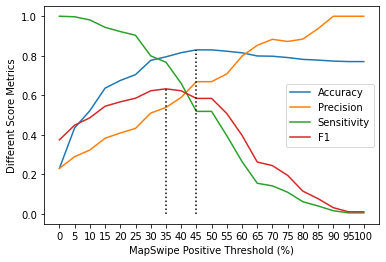

In [11]:
Kbm.plot_measures()

### ROC for obeserved TPRs and FPRs
Figure 12

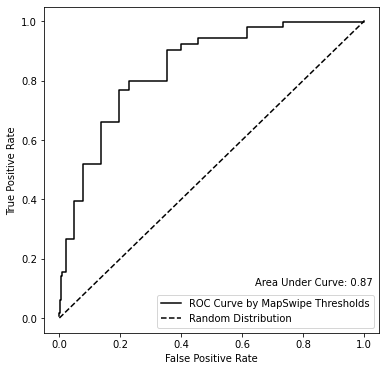

In [12]:
Kbm.plot_roc()

### The cumulative tiles per user distribution
Figure 14

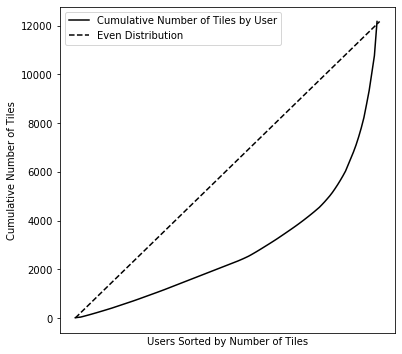

In [13]:
Kbm.cum_user_plot()

### Quality Measures for each MapSwipe user
Figure 15

The warnings appear because some users did process only a few tiles, leading to devision by 0 for some quality measures.

D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:593: RuntimeWarning: invalid value encountered in longlong_scalars
  prec = tp/(tp+fp)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:593: RuntimeWarning: invalid value encountered in longlong_scalars
  prec = tp/(tp+fp)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:596: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*(sens * prec) / (sens + prec)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:593: RuntimeWarning: invalid value encountered in longlong_scalars
  prec = tp/(tp+fp)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:594: RuntimeWarning: invalid value encountered in longlong_scalars
  sens = tp/(tp+fn)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:596: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*(sens * prec) / (sens + prec)
D:\Bachelorarbeit\thesis_code\thesis_code\Spyder\builder.py:593: RuntimeWarning: inv

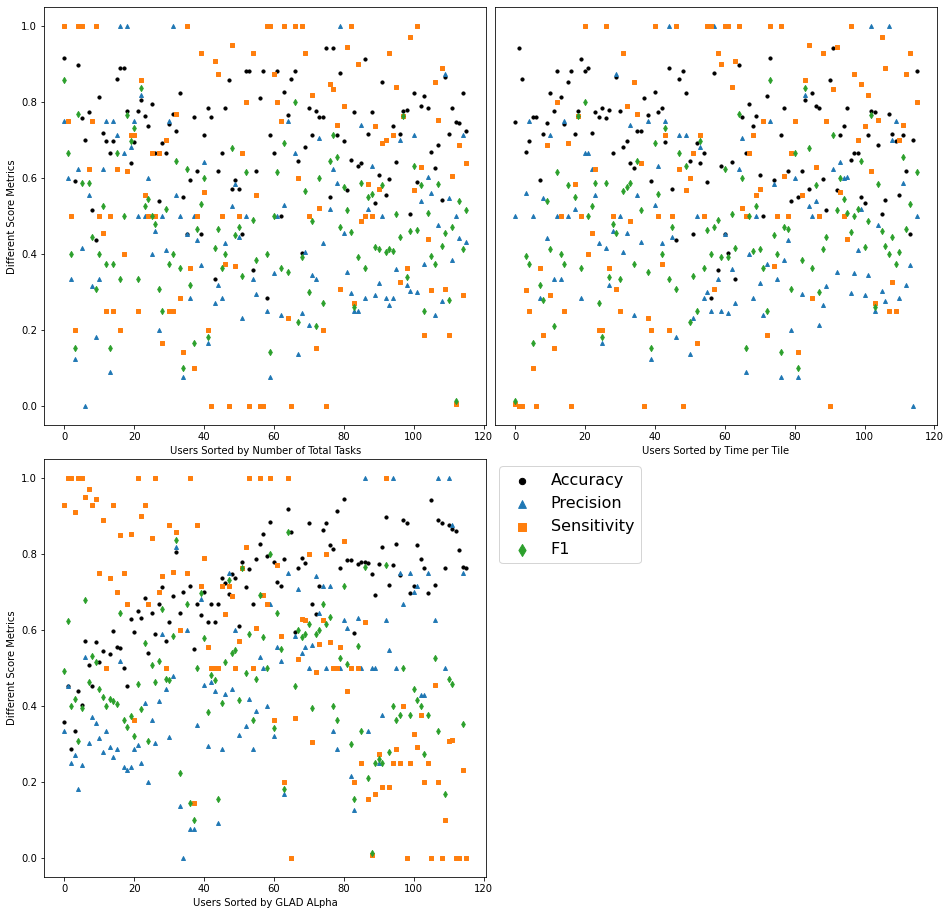

In [14]:
Kbm.plot_user_stats()

### ROCs for different user characterisitcs
Figure 16

Optimization terminated successfully.
         Current function value: 0.636985
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650083
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584938
         Iterations 5


(<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x256fc64a1c0>,
 8978     0.626671
 11937    0.626671
 3994     0.659416
 12317    0.626671
 4081     0.566479
            ...   
 5659     0.635305
 2341     0.610254
 1998     0.738966
 5710     0.592532
 7871     0.859330
 Length: 2436, dtype: float64)

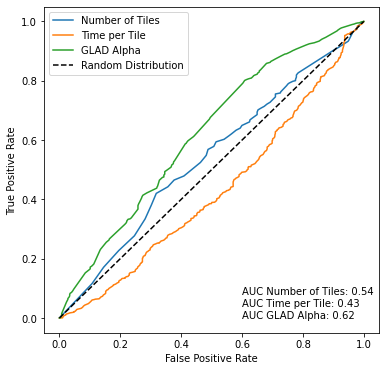

In [15]:
Kbm.logit_by_statsmodels()

### Cohens Kappas
Figures 17 and 19

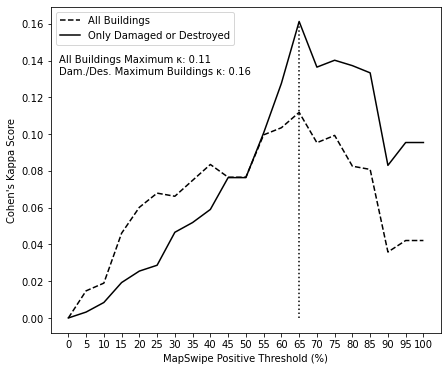

In [16]:
_ = Kbm.plot_ms_cop_comparison()

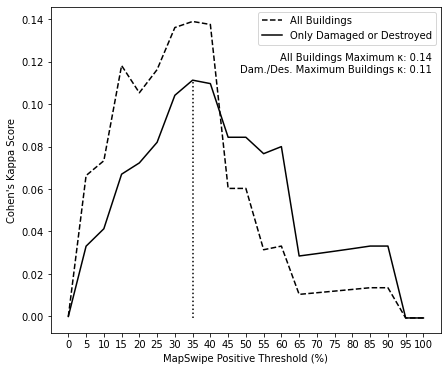

In [17]:
_ = Gb.plot_ms_cop_comparison()

### Note for Example Plotting

The example plotting file does only work with the raster images. These are unfortunately too large for a GitHub upload and are possible subjected too redistribution limits 

### Data Sources

In [18]:
data = pd.read_csv('../data_overview.csv', sep=";")
data

,Name,Date,Source,Type,Format,Geomtries (if appl.),Resolution
0,MS-Big: Aggregated Results (with Geometry),24.08.2021,https://mapswipe.org/en/project.html?projectId...,Geographic Vector Data,Geojson,Polygons,~ 160 m
1,MS-Big: Results,24.08.2021,https://mapswipe.org/en/project.html?projectId...,List,CSV,-,-
2,MS-Small: Aggregated Results (with Geometry),08.09.2021,https://mapswipe.org/en/project.html?projectId...,Geographic Vector Data,Geojson,Polygons,~ 40 m
3,MS-Small: Results,08.09.2021,https://mapswipe.org/en/project.html?projectId...,List,CSV,-,-
4,Satellite Picture before MS-Big,Unknown,Not publicly avilabe,"Geographic Raster, satellite",Web-Map,-,NaN
5,Satellite Picture after MS-Big,15.08.2021,104001006CA11700.tif on https://www.maxar.com/...,"Geographic Raster, satellite",GeoTIFF,-,~ 35 cm
6,Satellite Picture before MS-Small,Unknown,https://haitidata.org/clip/ortho,"Geographic Raster, satellite",Web-Map,-,NaN
7,Satellite Picture after MS-Small,24.08.2021,https://map.openaerialmap.org/#/-73.7484741210...,"Geographic Raster, drone picture",GeoTIFF,-,~ 2 cm
8,Copernicus Damage Grading,15.08.2021,https://emergency.copernicus.eu/mapping/ems-pr...,Geographic Vector Data,Shapefile,Points,-
9,OSM Building Footprints,05.01.2022,https://download.geofabrik.de/central-america/...,Geographic Vector Data,Shapefile,Polygons,-
